In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import copy
import random

In [2]:
def generate_random_graph(node_count, connectivity):
    G = nx.Graph()

    # Add nodes to the graph
    G.add_nodes_from(range(1, node_count + 1))

    # Ensure at least min_edges are added for connectivity

    # Add edges to achieve the desired connectivity
    while len(list(nx.isolates(G))) >0:
        node1 = random.randint(1, node_count)
        node2 = random.randint(1, node_count)
        if node1 != node2 and not G.has_edge(node1, node2):
            G.add_edge(node1, node2)

    # Add remaining edges randomly
    remaining_edges = int(node_count * (node_count - 1) * connectivity / 2)
    for _ in range(remaining_edges):
        node1 = random.randint(1, node_count)
        node2 = random.randint(1, node_count)
        if node1 != node2 and not G.has_edge(node1, node2):
            G.add_edge(node1, node2)

    return G

In [7]:
def visualize_graph(G):
    pos = nx.spring_layout(G)  # You can use other layouts as well

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='black', width=1.5)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)

    # Draw node labels
    node_labels = {node: node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

    plt.title("Graph Visualization")
    plt.show()

In [3]:
def add_weights_to_edges_from_dict(graph, weights_dict):
    for edge, weight in weights_dict.items():
        if graph.has_edge(*edge):
            graph[edge[0]][edge[1]]['weight'] = np.sqrt( np.log(1/weight)) *10
        elif graph.has_edge(*reversed(edge)):
            graph[reversed(edge)[0]][reversed(edge)[1]]['weight'] = np.sqrt( np.log(1/weight)) *10
        else:
            print(f"Edge {edge} not found in the graph.")

In [6]:
def probabilistic_walk(graph):
    visited_edges = set()
    walked_edges = []
    nodes = list(graph.nodes())
    
    current_node = random.choice(nodes)
    while len(visited_edges) < graph.number_of_edges():
        neighbors = list(graph.neighbors(current_node))
        weights = [graph[current_node][neighbor].get('weight', 1) for neighbor in neighbors]
        if len(weights) == 0:
            print("some fuckery")

        # Normalize weights to create probabilities
        try:
            probabilities = [weight / sum(weights) for weight in weights]
        except:
            print(weights)
            return
            

        next_node = random.choices(neighbors, weights=probabilities)[0]
        edge = (min(current_node, next_node), max(current_node, next_node))

        visited_edges.add(edge)
        walked_edges.append(edge)
        #print(f"Visited edge: {edge}")
        
        graph[current_node][next_node]['weight'] = np.sqrt(graph[current_node][next_node]['weight'])
        
        
        current_node = next_node

    return walked_edges

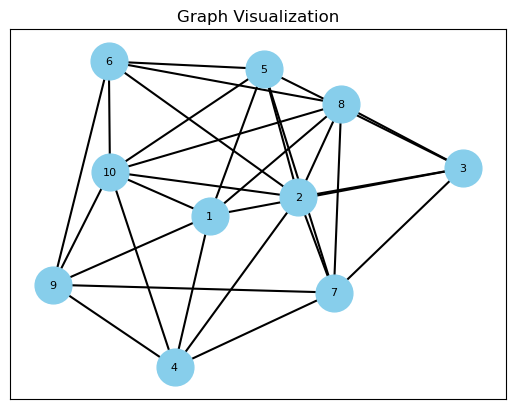

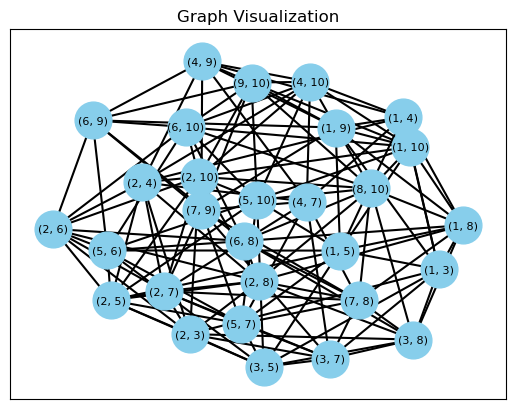

In [22]:
node_count = 10
connectivity = 1

G = generate_random_graph(node_count, connectivity)
L_G = nx.line_graph(G)
UN = vertex_dict = {vertex: 0.001 for vertex in L_G.nodes()}
PR = nx.pagerank(L_G,max_iter=100)
visualize_graph(G)
visualize_graph(L_G)


In [23]:
print(UN)
print(PR)

{(2, 4): 0.001, (4, 9): 0.001, (2, 7): 0.001, (7, 8): 0.001, (4, 7): 0.001, (5, 7): 0.001, (2, 6): 0.001, (5, 6): 0.001, (1, 9): 0.001, (8, 10): 0.001, (9, 10): 0.001, (1, 5): 0.001, (5, 10): 0.001, (3, 7): 0.001, (6, 10): 0.001, (2, 5): 0.001, (4, 10): 0.001, (7, 9): 0.001, (2, 3): 0.001, (1, 8): 0.001, (1, 10): 0.001, (6, 8): 0.001, (2, 10): 0.001, (3, 5): 0.001, (3, 8): 0.001, (1, 4): 0.001, (2, 8): 0.001, (6, 9): 0.001, (1, 3): 0.001}
{(2, 4): 0.03496955407929678, (4, 9): 0.029487905406717745, (2, 7): 0.037946017555716784, (7, 8): 0.035166624977099076, (4, 7): 0.0323385929921501, (5, 7): 0.035166624977099076, (2, 6): 0.03492428656197291, (5, 6): 0.03212744999717399, (1, 9): 0.03251305472155929, (8, 10): 0.03780286627537756, (9, 10): 0.035171223802518504, (1, 5): 0.035170280092147184, (5, 10): 0.03780286627537755, (3, 7): 0.03229548546187477, (6, 10): 0.034952327594440585, (2, 5): 0.03777444344196282, (4, 10): 0.03499759511176446, (7, 9): 0.032509461125473794, (2, 3): 0.034925743305

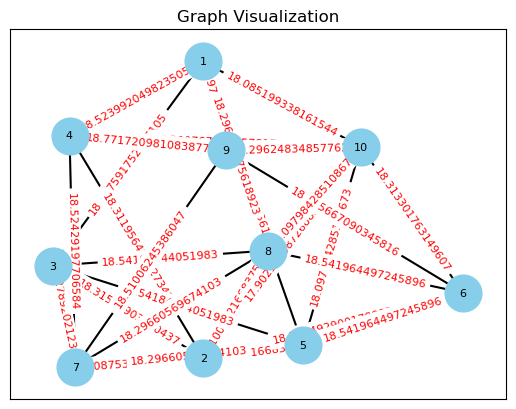

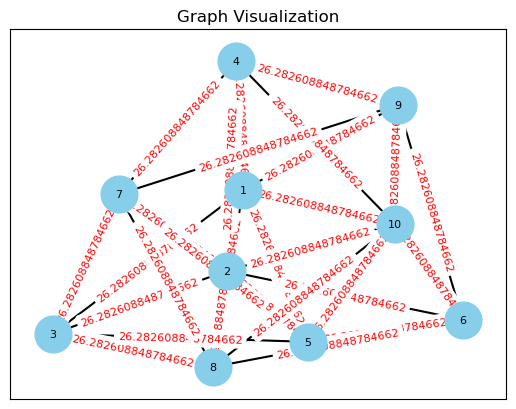

In [24]:
PR_G = copy.deepcopy(G)
UN_G = copy.deepcopy(G)

add_weights_to_edges_from_dict(PR_G,PR)
add_weights_to_edges_from_dict(UN_G,UN)

visualize_graph(PR_G)
visualize_graph(UN_G)

In [26]:

PR_WalkLens = []
UN_WalkLens = []
for i in range(10000):
    tmp=copy.deepcopy(PR_G)
    PR_WalkLens.append(len(probabilistic_walk(tmp)))
    tmp=copy.deepcopy(UN_G)
    UN_WalkLens.append(len(probabilistic_walk(tmp)))
print("average random walk length in G(PR): ",sum(PR_WalkLens)/len(PR_WalkLens))
print("average random walk length in G(UN): ",sum(UN_WalkLens)/len(UN_WalkLens))

average random walk length in G(PR):  53.2545
average random walk length in G(UN):  50.6331


In [28]:
print(min(UN_WalkLens))

33


In [29]:
UN_walks = []
PR_walks = []
edge_count = []
connectivity = 1

for i in range(10,50):
    G = generate_random_graph(i, connectivity)
    edge_count.append(G.number_of_edges())
    L_G = nx.line_graph(G)
    PR = nx.pagerank(L_G,max_iter=i*10)
    UN = vertex_dict = {vertex: 0.001 for vertex in L_G.nodes()}
    
    U_G = copy.deepcopy(G)
    P_G = copy.deepcopy(G)
    add_weights_to_edges_from_dict(U_G,UN)
    add_weights_to_edges_from_dict(P_G,PR)
    u_tmp =[]
    for i in range(500):
        tmp=copy.deepcopy(U_G)
        u_tmp.append(len(probabilistic_walk(tmp)))
    pr_tmp = []
    for i in range(500):
        tmp=copy.deepcopy(P_G)
        pr_tmp.append(len(probabilistic_walk(tmp)))
    UN_walks.append(u_tmp)
    PR_walks.append(pr_tmp)

In [30]:
for i in range(len(UN_walks)):
    print("Uniform avg: ",np.average(UN_walks[i])," PageRank avg: ",np.average(PR_walks[i]))

Uniform avg:  52.758  PageRank avg:  55.474
Uniform avg:  75.426  PageRank avg:  79.372
Uniform avg:  83.274  PageRank avg:  87.318
Uniform avg:  93.874  PageRank avg:  98.054
Uniform avg:  112.562  PageRank avg:  117.926
Uniform avg:  126.26  PageRank avg:  131.12
Uniform avg:  140.742  PageRank avg:  148.106
Uniform avg:  180.694  PageRank avg:  185.876
Uniform avg:  212.03  PageRank avg:  216.652
Uniform avg:  248.786  PageRank avg:  252.62
Uniform avg:  257.018  PageRank avg:  264.092
Uniform avg:  264.146  PageRank avg:  271.75
Uniform avg:  292.524  PageRank avg:  300.288
Uniform avg:  316.238  PageRank avg:  326.08
Uniform avg:  360.594  PageRank avg:  365.836
Uniform avg:  390.932  PageRank avg:  399.394
Uniform avg:  409.432  PageRank avg:  419.272
Uniform avg:  437.13  PageRank avg:  440.338
Uniform avg:  477.538  PageRank avg:  484.24
Uniform avg:  511.428  PageRank avg:  522.262
Uniform avg:  559.926  PageRank avg:  569.882
Uniform avg:  588.284  PageRank avg:  605.092
Unif

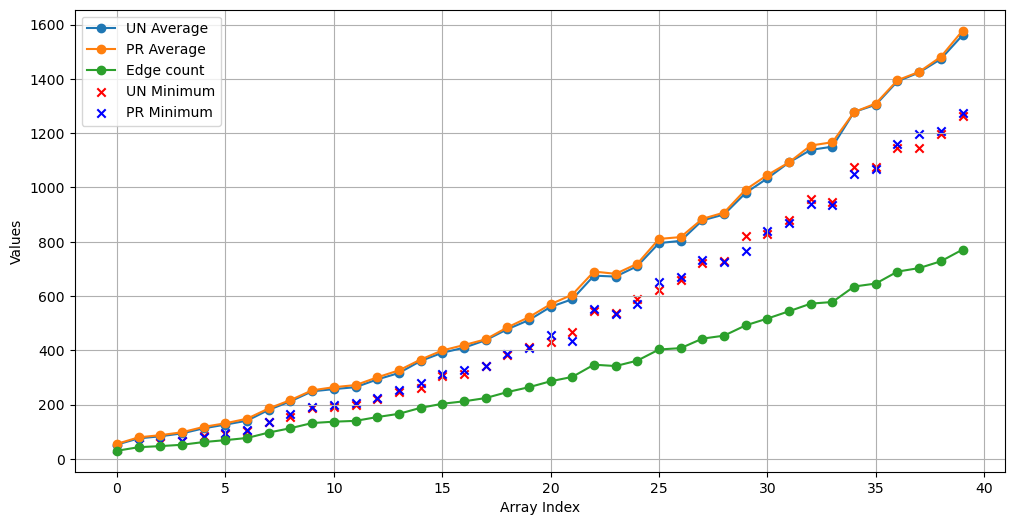

In [31]:
np_u = np.array(UN_walks)
np_p = np.array(PR_walks)

avg_r = np.mean(np_u,axis=1)
avg_p = np.mean(np_p,axis=1)

min_r = np.min(np_u,axis=1)
min_p = np.min(np_p,axis=1)

np_e = np.array(edge_count)

plt.figure(figsize=(12, 6))

plt.plot( avg_r, label='UN Average', marker='o')
plt.plot( avg_p, label='PR Average', marker='o')
plt.plot( np_e, label='Edge count', marker='o')

# Plot minimums
plt.scatter(range(len(min_r)), min_r, color='red', label='UN Minimum', marker='x')
plt.scatter(range(len(min_p)), min_p, color='blue', label='PR Minimum', marker='x')

plt.xlabel('Array Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



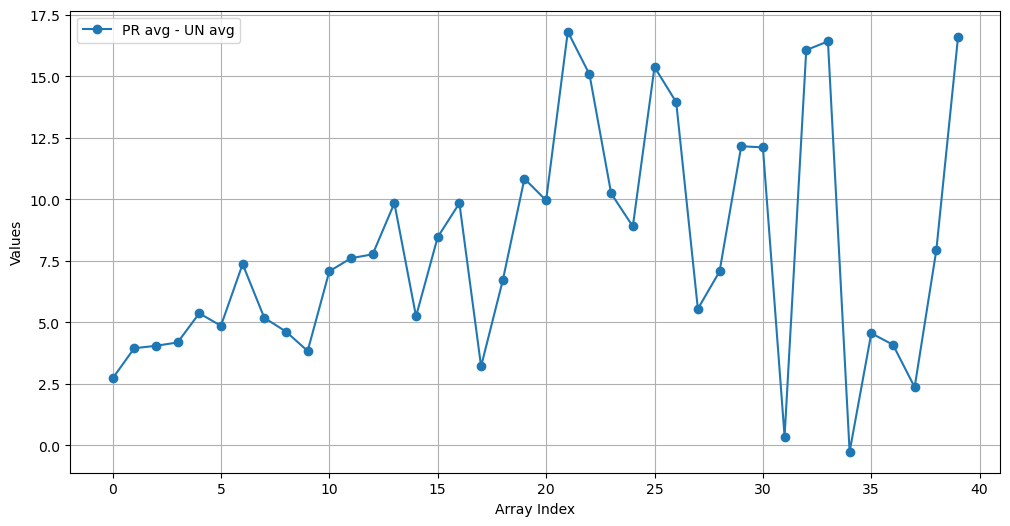

In [33]:
avg_diff = []
min_diff = []
for i in range(len(UN_walks)):
    avg_diff.append((np.average(PR_walks[i]) - np.average(UN_walks[i])))
    min_diff.append((min(PR_walks[i]) - min(UN_walks[i])))
    
plt.figure(figsize=(12, 6))

plt.plot( avg_diff, label='PR avg - UN avg', marker='o')
#plt.plot( min_diff, label='PR min - UN min', marker='o')

plt.xlabel('Array Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


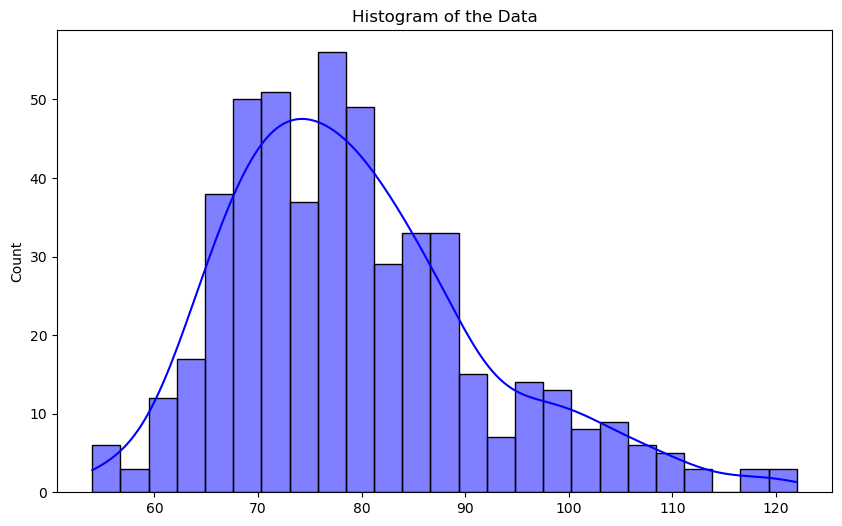

In [40]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(PR_walks[1], kde=True, color='blue', bins=25)
plt.title("Histogram of the Data")
plt.show()

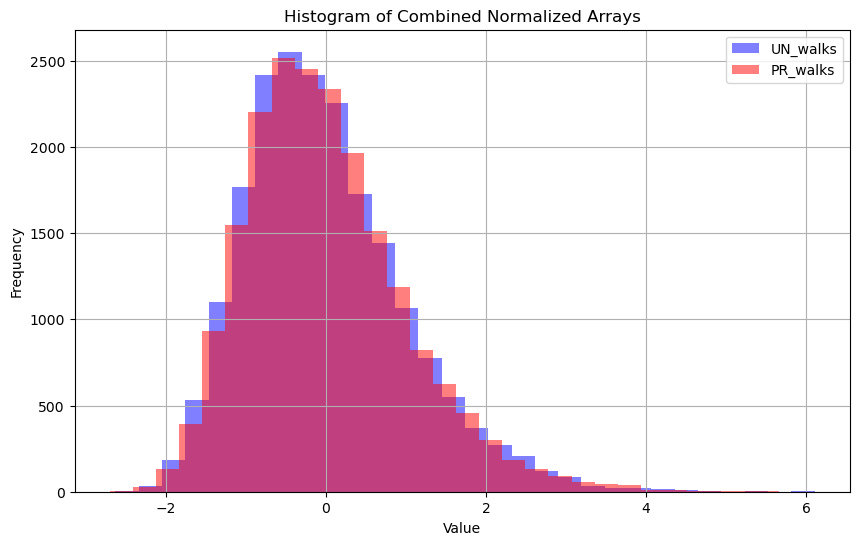

In [45]:
# Apply z-score normalization to each array individually for UN_walks
normalized_UN_walks = [(array - np.mean(array)) / np.std(array) for array in UN_walks]

# Apply z-score normalization to each array individually for PR_walks
normalized_PR_walks = [(array - np.mean(array)) / np.std(array) for array in PR_walks]

# Combine the normalized arrays into a single array
combined_normalized_array = np.concatenate(normalized_UN_walks + normalized_PR_walks)

# Plotting histogram
plt.figure(figsize=(10, 6))

# Histogram for UN_walks
plt.hist(np.concatenate(normalized_UN_walks), bins=30, alpha=0.5, color='blue', label='UN_walks')

# Histogram for PR_walks
plt.hist(np.concatenate(normalized_PR_walks), bins=30, alpha=0.5, color='red', label='PR_walks')

plt.title('Histogram of Combined Normalized Arrays')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()

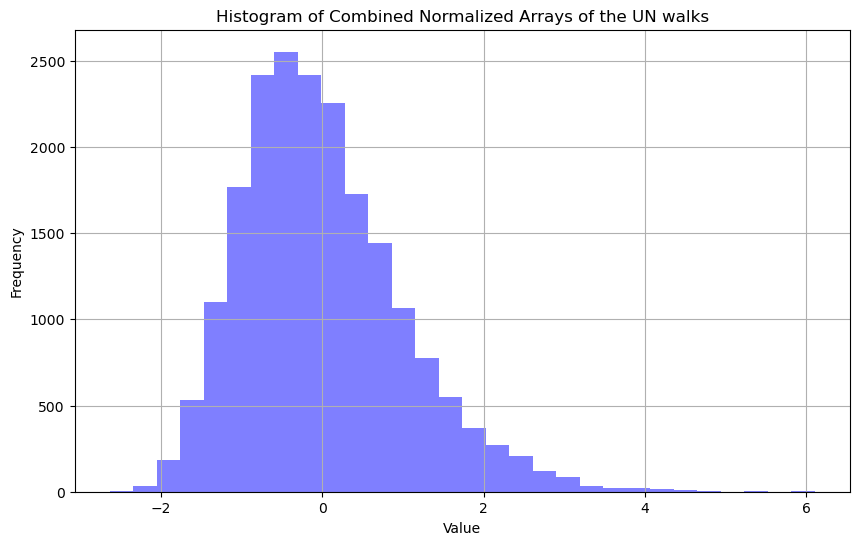

In [44]:
PR_walks_array = np.array(UN_walks)
normalized_arrays = [(array - np.mean(array)) / np.std(array) for array in UN_walks]

# Combine the normalized arrays into a single array
combined_normalized_array = np.concatenate(normalized_arrays)

# Plotting histogram
plt.figure(figsize=(10, 6))

plt.hist(combined_normalized_array, bins=30, alpha=0.5, color='blue')

plt.title('Histogram of Combined Normalized Arrays of the UN walks')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()